# Guide to Visualization

https://towardsdatascience.com/a-simple-guide-to-beautiful-visualizations-in-python-f564e6b9d392

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Globally Setting: Graph style and Font size
First, we use sns.set_style() to set the graph style. This will make Matplotlib and Seaborn graphs look better by default. Then we use plt.rc() to customize the font size of the text displayed in the plots.

In [2]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

## Customization of Plots
* sns.color_palette(‘deep’) #darker
*sns.color_palette(‘pastel’)#lighter
* sns.color_palette(‘Set2’) #in between
These palettes have the form of a list, so instead of using the classical ‘b’ to obtain the blue color, you can extract the color from these palettes by doing sns.color_palette('deep')[0]. If you execute this code, you’ll obtain an RGB code like this (0.298, 0.447, 0.690), which is accepted in the color parameter in Matplotlib’s plots. We’ll check this better when creating the plots.
### Most freq. used
``` python
plt.figure(figsize=(8,4),tight_layout=True)
# matplotlib
plt.hist(..., color=sns.color_palette('Set2')[2], linewidth=2)
# seaborn
ax = sns.histplot(..., palette='Set2', linewidth=2) # seaborn will have either the color or palette parameters available (it depends on the plot)
#subplots
fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(12,5),tight_layout=True)
```
After creating subplots, we’ll use either one-dimensional ax[0] or two-dimensional axes ax[0][0]
```python
# label and title
# matplotlib
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
#seaborn
ax.set(title='Barplot', xlabel='Nationality', ylabel='Average Rating')
```

## The Dataset
This is a Fifa players dataset that will help us compare non-traditional football nations like the USA and Canada with big football nations such as England, Brazil, and Argentina. Hopefully, at the end of this article, we’ll better understand what makes football different in those countries.
For the following sections, we’ll work with a dataframe named df_country that will include only the countries in question. The code below will take care of that.

In [3]:
df_fifa21 = pd.read_csv('players_20.csv')
#df_fifa21['nationality'].isin(country) return index and true/false of all the observations

In [4]:
df_fifa21.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+6,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,62+3,62+3,62+3,65+3,61+3,54+3,54+3,54+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+6,61+6,61+6,61+6,67+6,61+6,47+6,47+6,47+6,61+6
3,200389,https://sofifa.com/player/200389/jan-oblak/200002,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+6,63+6,63+6,63+6,66+6,61+6,49+6,49+6,49+6,61+6


In [5]:
country = ['United States', 'Canada', 'England', 'Brazil', 'Argentina']
df_country = df_fifa21[df_fifa21['nationality'].isin(country)]
df_country.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+6,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+6,61+6,61+6,61+6,67+6,61+6,47+6,47+6,47+6,61+6
12,202126,https://sofifa.com/player/202126/harry-kane/20...,H. Kane,Harry Kane,25,1993-07-28,188,89,England,Tottenham Hotspur,...,65+3,66+3,66+3,66+3,65+3,62+3,61+3,61+3,61+3,62+3
13,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,26,1992-10-02,191,91,Brazil,Liverpool,...,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3
17,153079,https://sofifa.com/player/153079/sergio-aguero...,S. Agüero,Sergio Leonel Agüero del Castillo,31,1988-06-02,173,70,Argentina,Manchester City,...,61+3,58+3,58+3,58+3,61+3,57+3,51+3,51+3,51+3,57+3


## Bar Plot
Bar plots can be easily created with both MatplotLib and Seaborn with some slight differences. A barplot will display categorical data with rectangular bars with heights or lengths proportional to the values that they represent. It’ll be interesting to see the average rating of football player by nationality
The code below shows the extra preprocessing necessary only for this plot.

In [6]:
# Preprocessing
#df_country.groupby(['nationality']).mean() displays all the 
#columns with index nationality
#df_country.groupby(['nationality'], as_index=False).mean() resets index
#df_country.groupby(['nationality']).mean()[['nationality', 'overall']]
#throws a keyerror of nationality
df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

,nationality,overall
0,Argentina,69.118510
1,Brazil,71.143894
2,Canada,62.855072
3,England,63.253293
4,United States,64.538682


### Bar Plot in MatplotLib with plt.bar()
MatplotLib’s plt.bar() needs two arguments — the name of the categorical variable (nationality) and their lengths (overall ratings).

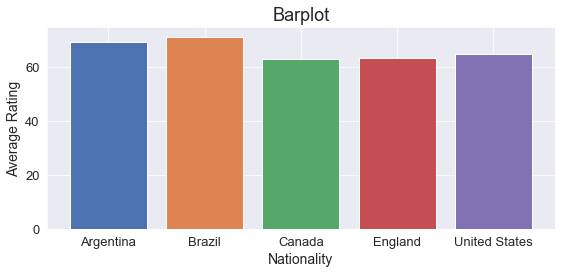

In [7]:
barplot = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('deep')
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5])
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
plt.show()

Apparently, there’s no big difference between the rating of an average player from Canada, the USA, and England. However, average players don’t make it to the national teams, but only the top players in each country do it, so if we get the average rating of the top 20 players, the plot would change. Let’s check this with seaborn.
### Bar Plot in Seaborn with sns.barplot()
To get the top 20 players of each country we need to do some preprocessing

In [8]:
df_country['overall']

0        94
2        92
12       89
13       89
17       89
         ..
18458    48
18460    48
18461    48
18470    48
18475    48
Name: overall, Length: 3801, dtype: int64

we note that the data is already sorted

In [9]:
# preprocessing
new_df = pd.concat(
[df_country[df_country['nationality']=='Argentina'][:20], 
 df_country[df_country['nationality']=='Brazil'][:20], 
 df_country[df_country['nationality']=='England'][:20], 
 df_country[df_country['nationality']=='Canada'][:20], 
 df_country[df_country['nationality']=='United States'][:20]]
)
new_df.shape
#concatenated as defined in the list order Arg first US last

(100, 106)

```python
df_country[df_country['nationality']=='Argentina'][:20]
#returns top 20 playres from argentina
```

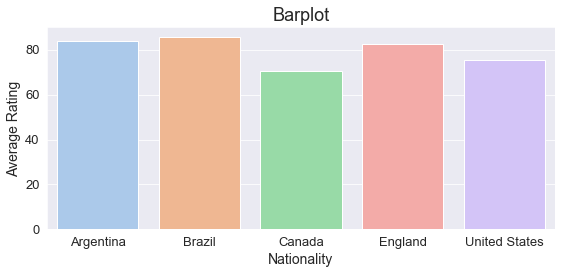

In [10]:
barplot = new_df.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['overall'], palette='pastel',ci=None)
ax.set(title='Barplot', xlabel='Nationality', ylabel='Average Rating')
plt.show()

The difference in ratings between top players is evident. This reveals why the USA and Canada aren’t big football nations yet, but that’s not everything let’s dig deeper.
### Barplot grouped by “n” variables
Now let’s see how many players play in the top football leagues. To do so, we need to group the data by nationality and league (we’ll leave out the Premier League since most England players play in this competition)

In [11]:
# Preprocessing
X = df_country[df_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga'])]
X.groupby(['nationality', 'league_name'], as_index=False).count()

,nationality,league_name,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,Argentina,German 1. Bundesliga,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,Argentina,Italian Serie A,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
2,Argentina,Spain Primera Division,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
3,Brazil,German 1. Bundesliga,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
4,Brazil,Italian Serie A,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
5,Brazil,Spain Primera Division,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
6,Canada,German 1. Bundesliga,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,England,German 1. Bundesliga,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
8,England,Italian Serie A,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,England,Spain Primera Division,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


avoid writing more lines of code we’ll use Seaborn. Data grouped by “n” variables can be easily plotted by adding the hue=‘’ parameter.

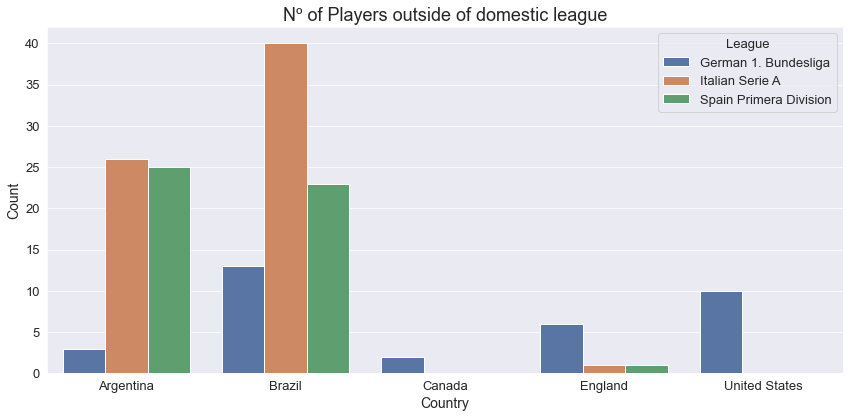

In [12]:
barplot = X.groupby(['nationality', 'league_name'], as_index=False).count()
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['sofifa_id'], hue=barplot['league_name'], palette='deep')
ax.set(title='Nº of Players outside of domestic league' ,xlabel='Country', ylabel='Count')
ax.legend(title='League', title_fontsize='13', loc='upper right')
plt.show()

As we can see, most Argentine and Brazilian footballers play in the top leagues while Canadians and Americans don’t. Players in top leagues make an impact on the national team's success in competitions, so this explains why Brazil and Argentina are big football nations.
## Histogram
A histogram represents the distribution of numerical data. Let’s look at the height distribution of football players and analyze its relevance in this sport.
### Histograms with plt.hist() or sns.histplot()
MatplotLib’s plt.hist() and Seaborn’s sns.histplot()work the same. Both need two arguments — the name of the numerical variable (height) and the number or list of bins. In this case, we made a list of bins called bins that will be displayed on the x-axis.

In [13]:
df_country['height_cm'].describe() #use two [['height']] to return as df

count    3801.000000
mean      181.000526
std         6.855808
min       156.000000
25%       176.000000
50%       181.000000
75%       186.000000
max       203.000000
Name: height_cm, dtype: float64

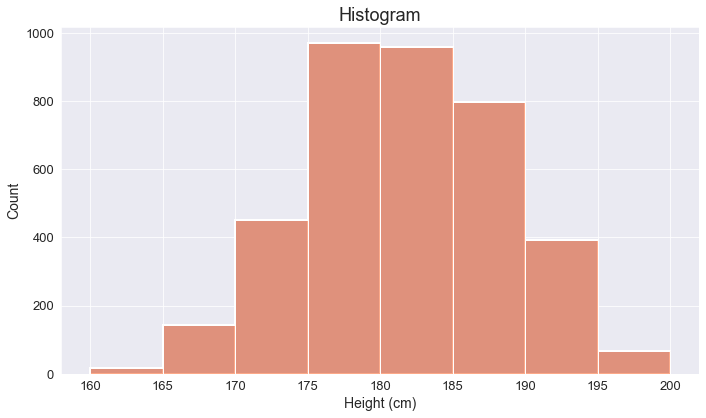

In [14]:
plt.figure(figsize=(10,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]
# matplotlib
plt.hist(df_country['height_cm'], bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
plt.title('Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
# seaborn
ax = sns.histplot(data=df_country, x='height_cm', bins=bins, color=sns.color_palette('Set2')[1], linewidth=1)
ax.set(title='Histogram', xlabel='Height (cm)', ylabel='Count')
plt.show()

The histogram reveals that most players’ height is between 175-185 cm, so it seems that being taller than 185cm isn’t so important in football. Let’s check the distribution of height in players from different nations with boxplots.
## Boxplot
Boxplots display the distribution of data based on the minimum value, first quartile (Q1), median, third quartile (Q3), and maximum value. In this case, we’ll make a boxplot showing the height distribution in players from the 5 countries.

Boxplots of multiple categorical variables can be plotted on Matplotlib but it needs some extra preprocessing, so to keep things simple we’ll use Seaborn’s sns.boxplot(). When making boxplots with multiple categorical variables we need two arguments — the name of the categorical variable (nationality) and the name of the numerical variable (height_cm)

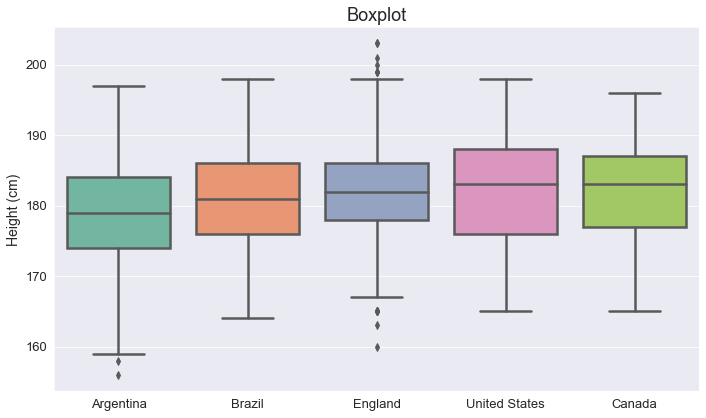

In [15]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=df_country, x='nationality', y='height_cm', palette='Set2', linewidth=2.5)
ax.set(title='Boxplot', xlabel='', ylabel='Height (cm)')
plt.show()

Now the boxplot reveals that a national team doesn’t need many tall football players to succeed in competitions since the median of Argentina and Brazil is lower than in the rest of the countries. Argentina even presents the shortest football players among the five countries represented by the long bottom whisker.
## Scatterplot
A scatter plot displays and shows the relation between two numerical variables in a dataset. In this case, we’ll see the relationship between the height and weight of players.

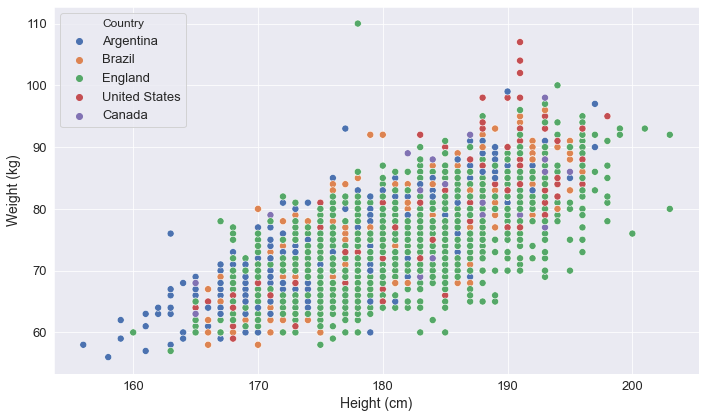

In [16]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg',   hue='nationality', palette='deep', s=50)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12) 
plt.show()

In this plot, we added the sto control the dot size and also hue to differentiate the nationality

From this scatterplot, we can see that weight and height distribution fit a simple linear regression.
## Piechart + Subplots
### Single Piechart
We’re going to make a piechart that displays the value of players. In this example, we’ll pick the most valuable player in the USMNT (Pullisic) and see how valuable he is in his club.

In [17]:
# Preprocessing 
#filtering with club name and then sorting based on their valuein euros and displaying name and value_eur and top 11
piechart=df_fifa21[df_fifa21['club_name']=='Chelsea'].sort_values('value_eur', ascending=False)[['short_name', 'value_eur']][:11]
piechart

,short_name,value_eur
15,N. Kanté,66000000
111,Kepa,31000000
199,Jorginho,29000000
241,M. Kovačić,29000000
144,Azpilicueta,25500000
264,A. Rüdiger,24000000
299,Willian,21000000
310,Pedro,19500000
415,A. Christensen,19000000
436,T. Bakayoko,18000000


Now that the data is ready we can make a piechart with Matplolib’s plt.pie() Apart from the parameters we usually add, we’ll also consider autopct to round the numbers, explode to highlight a specific player, pctdistance to adjust the distance of the labels and shadow=True to give the chart a solid appearance.

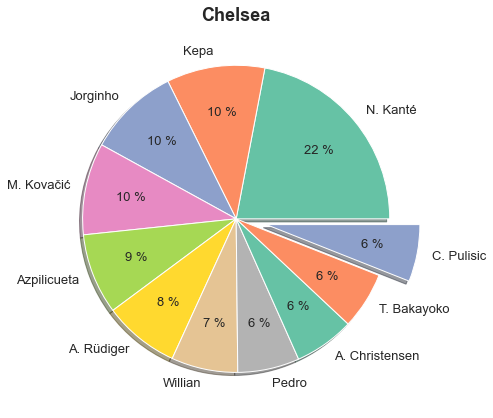

In [18]:
colors = sns.color_palette('Set2')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=0.7,
          colors=colors, shadow=True)
plt.title('Chelsea', weight='bold')
plt.show()
#autopct='%.2f %%'

The piechart shows that Pullisic isn’t the most valuable player in his club, but at least he’s in the top 11.
### Piechart side by side (subplots)
Now let’s plot 2 piecharts side by side to see the impact of this player on his club and national team. To do so, we’ll use plt.subplots(nrows, ncols). Here the rows and the columns determine the number of plots we’re going to create so nrow=1 and ncols=2 means 1 plot per column (2 in total).

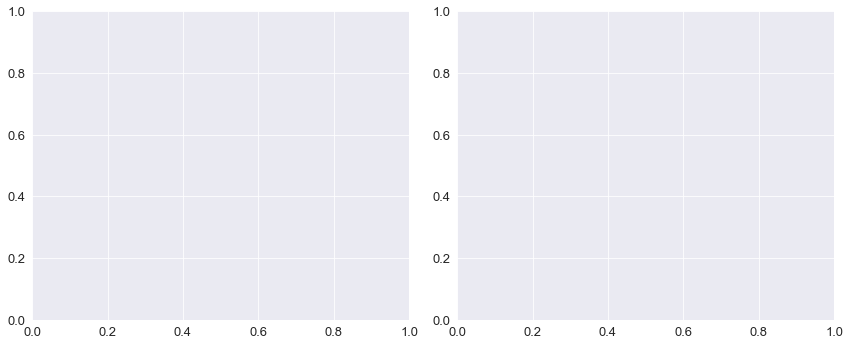

In [19]:
#subplots
fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)

Also, we need to create a second piechart frame piechart2, apart from the piechart we created before.
Now we can plot the 2 piecharts side by side.

In [20]:
# Preprocessing
piechart2 = df_fifa21[df_fifa21['nationality']=='United States']
piechart2 = piechart2[:10].sort_values('value_eur')[['short_name', 'value_eur']]
piechart2

,short_name,value_eur
1447,M. Bradley,6000000
1479,F. Johnson,7000000
1471,J. Altidore,7500000
1294,Z. Steffen,8500000
1372,D. Yedlin,8500000
1688,T. Boyd,9000000
1266,T. Adams,11500000
1269,W. McKennie,12500000
630,J. Brooks,14000000
584,C. Pulisic,18000000


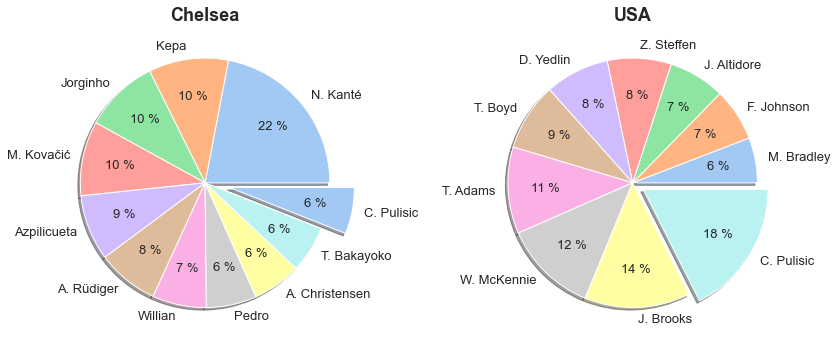

In [21]:
#subplots
fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)
colors = sns.color_palette('pastel')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
ax[0].pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[0].set_title('Chelsea', weight='bold')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]
ax[1].pie(piechart2['value_eur'], labels=piechart2['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[1].set_title('USA', weight='bold')
plt.show()

# Line Plot
We’ll plot the ratings of the top football players to see how the rating evolved over the past 5 years. To do so, we have to read the Fifa dataset from 2017 and wrangle the data.

In [22]:
# preprocessing
df_fifa21 = pd.read_csv('players_21.csv')
df_fifa20 = pd.read_csv('players_20.csv')
df_fifa19 = pd.read_csv('players_19.csv')
df_fifa18 = pd.read_csv('players_18.csv')
df_fifa17 = pd.read_csv('players_17.csv')
frames = [df_fifa17, df_fifa18, df_fifa19, df_fifa20, df_fifa21]
for i, frame in enumerate(frames):
    frame['year'] = 2017 + i
#frame is now a list of dataframes with column year added to them 

In [23]:
#using pd.concat which takes list of dfs as input to merge the dataframes
pd.concat(frames)[['short_name', 'overall', 'year']]

,short_name,overall,year
0,Cristiano Ronaldo,94,2017
1,L. Messi,93,2017
2,Neymar,92,2017
3,M. Neuer,92,2017
4,L. Suárez,92,2017
...,...,...,...
18939,K. Angulo,47,2021
18940,Zhang Mengxuan,47,2021
18941,Wang Zhenghao,47,2021
18942,Chen Zitong,47,2021


In [24]:
lineplot = pd.concat(frames)[['short_name', 'overall', 'year']]
list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk']
lineplot = lineplot[lineplot['short_name'].isin(list_players)]
lineplot

,short_name,overall,year
0,Cristiano Ronaldo,94,2017
1,L. Messi,93,2017
18,K. De Bruyne,88,2017
561,V. van Dijk,79,2017
0,Cristiano Ronaldo,94,2018
1,L. Messi,93,2018
12,K. De Bruyne,89,2018
127,K. Mbappé,83,2018
147,V. van Dijk,83,2018
0,Cristiano Ronaldo,94,2019


In [25]:
#pivot for creating a table
lineplot.pivot(index='short_name', columns='year' ,values='overall')

year,2017,2018,2019,2020,2021
short_name,,,,,
Cristiano Ronaldo,94.0,94.0,94.0,93.0,92.0
K. De Bruyne,88.0,89.0,91.0,91.0,91.0
K. Mbappé,NaN,83.0,87.0,89.0,90.0
L. Messi,93.0,93.0,94.0,94.0,93.0
V. van Dijk,79.0,83.0,85.0,90.0,90.0


In [26]:
lineplot = lineplot.pivot(index='short_name', columns='year' ,values='overall').T
lineplot

short_name,Cristiano Ronaldo,K. De Bruyne,K. Mbappé,L. Messi,V. van Dijk
year,,,,,
2017,94.0,88.0,NaN,93.0,79.0
2018,94.0,89.0,83.0,93.0,83.0
2019,94.0,91.0,87.0,94.0,85.0
2020,93.0,91.0,89.0,94.0,90.0
2021,92.0,91.0,90.0,93.0,90.0


In [27]:
lineplot.reset_index(inplace=True)
lineplot

short_name,year,Cristiano Ronaldo,K. De Bruyne,K. Mbappé,L. Messi,V. van Dijk
0,2017,94.0,88.0,NaN,93.0,79.0
1,2018,94.0,89.0,83.0,93.0,83.0
2,2019,94.0,91.0,87.0,94.0,85.0
3,2020,93.0,91.0,89.0,94.0,90.0
4,2021,92.0,91.0,90.0,93.0,90.0


In [28]:
lineplot = lineplot.set_index('year')
lineplot

short_name,Cristiano Ronaldo,K. De Bruyne,K. Mbappé,L. Messi,V. van Dijk
year,,,,,
2017,94.0,88.0,NaN,93.0,79.0
2018,94.0,89.0,83.0,93.0,83.0
2019,94.0,91.0,87.0,94.0,85.0
2020,93.0,91.0,89.0,94.0,90.0
2021,92.0,91.0,90.0,93.0,90.0


Acessing pivot table element is same as df use .loc

In [29]:
lineplot.columns.to_list()

['Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'L. Messi', 'V. van Dijk']

In [30]:
lineplot.index

Int64Index([2017, 2018, 2019, 2020, 2021], dtype='int64', name='year')

In [31]:
lineplot.loc[2018,"Cristiano Ronaldo"]

94.0

### Line Plot in Matplolib with plt.plot()
Making a line plot it’s as easy as typing plt.plot() on Matplotlib, but we’ll do some simple customization to make it look better.

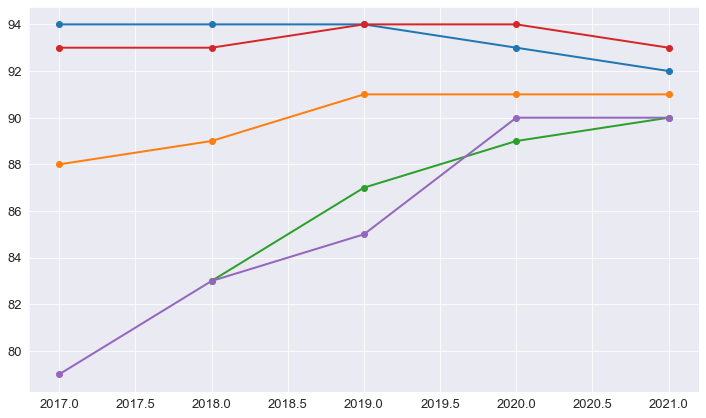

In [32]:
plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(lineplot, 'o-', linewidth=2)

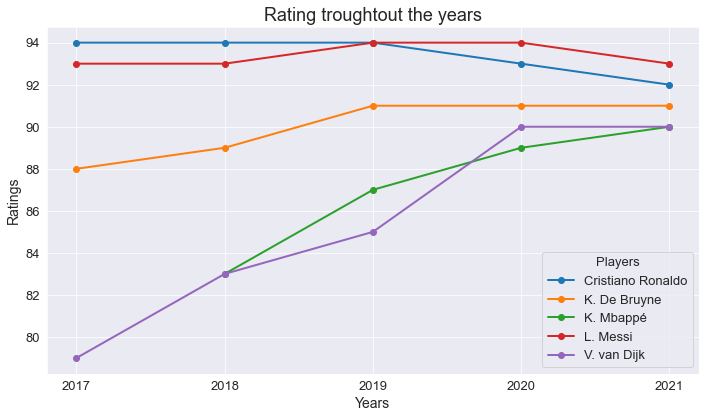

In [33]:
plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(lineplot, 'o-', linewidth=2)
#customization
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Rating troughtout the years')
plt.legend(title='Players', title_fontsize = 13, labels=lineplot.columns.to_list())
plt.show()

### Line Plot in Seaborn with sns.lineplot()

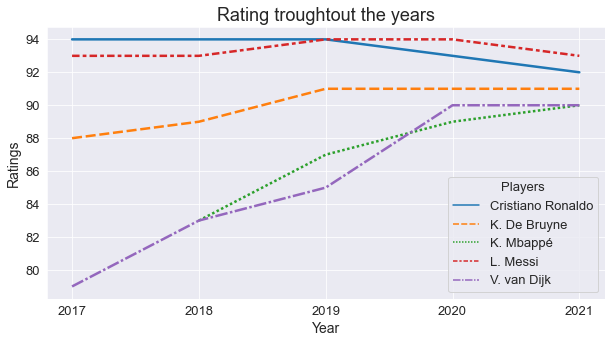

In [34]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=lineplot, linewidth=2.5)
ax.set(xlabel='Year', ylabel='Ratings', title='Rating troughtout the years', xticks=[2017, 2018, 2019, 2020, 2021])
ax.legend(title='Players', title_fontsize = 13)
plt.show()